# Lecture 10 Demos
## October 25, 2023

## Define and visualize a funciton for test

Text(0, 0.5, 'y')

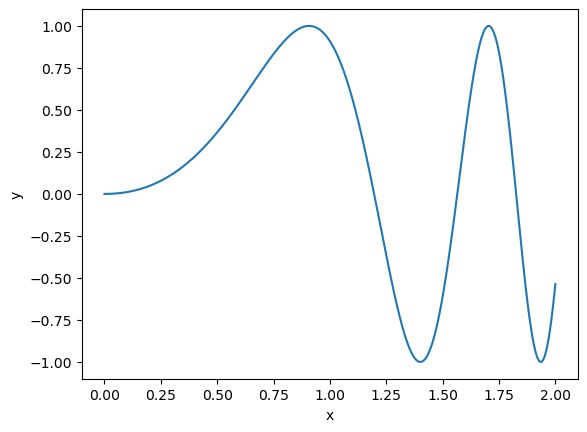

In [6]:
import numpy as np

def f(x):
    return np.sin(x**2+x**3)

a, b = 0,2

import matplotlib.pyplot as plt
x = np.linspace(a,b,1000)
y = f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

## Numerical Differentiation

In [2]:
import numpy as np
from scipy.misc import derivative

x_value = 2  # The point at which we want the derivative

# Using scipy's derivative function with order 3 (which uses central differences)
# and a small dx value for numerical stability and precision.
deriv = derivative(f, x_value, dx=1e-6, order=3)

print(f"The derivative of f(x) x = {x_value} is {deriv}")


The derivative of f(x) x = 2 is -2.614574483528198


/tmp/ipykernel_30/1774128923.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  deriv = derivative(f, x_value, dx=1e-6, order=3)


In [4]:
!pip install numdifftools


  Using cached numdifftools-0.9.41-py2.py3-none-any.whl (100 kB)


In [5]:
import numdifftools as nd
import numpy as np



# Point at which to find the derivative
x_value = 2

# Create a derivative function
df = nd.Derivative(f)

# Evaluate the derivative at the point
deriv = df(x_value)

print(f"The derivative of f(x) at x = {x_value} is {deriv}")


The derivative of f(x) at x = 2 is -2.6145744834548896


## Using the Trapezoidal rule:
This is a simple method that approximates the integral by summing the areas of trapezoids under the curve.

In [10]:
n = 10000000  # number of subintervals
x = np.linspace(a, b, n+1)
y = f(x)

result = np.trapz(y, x)
print(result) 


0.35785643029627295


## Using Simpson's rule 
with simps from scipy.integrate:
The simps function provides a way to approximate the definite integral using Simpson's rule.


The choice between Simpson's 1/3 rule and Simpson's 3/8 rule (or a combination of both) depends on the number of sample points:

- If the number of intervals (or sample points minus one) is even, the function will use Simpson's 1/3 rule.

- If the number of intervals is odd, it will use a combination of Simpson's 1/3 rule for the majority of the intervals and Simpson's 3/8 rule for the last three intervals to ensure all points are used.

- For example, we have n+1 = 101 sample points, resulting in n = 100 intervals. Since 100 is even, the function will use Simpson's 1/3 rule for the entire range.

In [11]:
from scipy.integrate import simps

n = 100
x = np.linspace(a, b, n+1)
y = f(x)

result = simps(y, x)
print(result)  

0.35785365541292874


## Gaussian Quadrature 
with numpy.polynomial.legendre.leggauss:

In [13]:
from numpy.polynomial.legendre import leggauss
n = 10  # Using 5 points here
x, w = leggauss(n)

# Change of interval
xi = 0.5*(b - a)*x + 0.5*(b + a)
wi = 0.5*(b - a)*w

result = sum(wi * f(xi))
print(result)  

0.35807811422713826


## Recommended Method
**Using the quad function from scipy.integrate:**
The quad function provides a way to compute the definite integral of a function between two endpoints.


It works by adaptively selecting intervals for integration based on the function's behavior. If the function appears smooth on an interval, the method will integrate over it and move on. If there are signs of a singularity or rapid change, the interval is subdivided, and the method attempts to integrate over the smaller intervals. This process continues until the function is adequately approximated over all intervals, or until a maximum number of subdivisions is reached.

In essence, quad dynamically adjusts where it samples the function based on how the function behaves, aiming to use more sample points where the function changes rapidly and fewer where it is smooth, thus optimizing the balance between accuracy and computational effort.



In [14]:
from scipy.integrate import quad


result, _ = quad(f, a, b)
print(result)  

0.3578564302962276


## Test a few different functions

Text(0, 0.5, 'y')

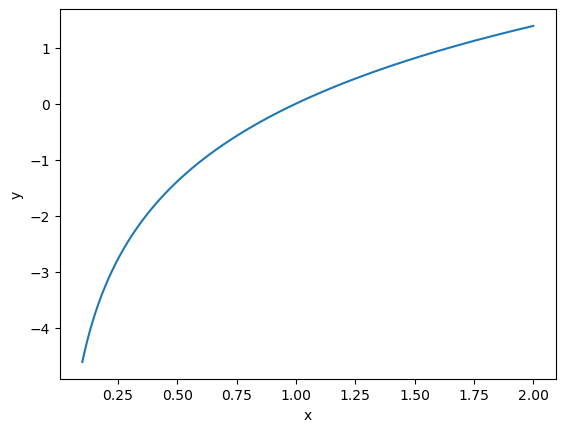

In [15]:
import numpy as np

def f(x):
#    return np.sin(x**2)
    return np.log(x**2)

a, b = 0.1,2

import matplotlib.pyplot as plt
x = np.linspace(a,b,1000)
y = f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [18]:
n = 100

x = np.linspace(a, b, n+1)
y = f(x)

result = np.trapz(y, x)
print('Trapezoid rule: ',result) 

from scipy.integrate import simps


x = np.linspace(a, b, n+1)
y = f(x)

result = simps(y, x)
print('Simpsons rule: ', result)  

from numpy.polynomial.legendre import leggauss

x, w = leggauss(n)

# Change of interval
xi = 0.5*(b - a)*x + 0.5*(b + a)
wi = 0.5*(b - a)*w

result = sum(wi * f(xi))
print('Gaussian Quadrature: ',result)

from scipy.integrate import quad

result, _ = quad(f, a, b)
print('Scipy\' s quad method:', result)  



Trapezoid rule:  -0.5674651258546619
Simpsons rule:  -0.5668970197511429
Gaussian Quadrature:  -0.566894259161398
Scipy' s quad method: -0.5668942591614102
